In [70]:
import numpy as np
import random

# Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.quantum_info import AerStatevector

from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [71]:
simulator = AerSimulator()
simulator

AerSimulator('aer_simulator')

In [72]:
def random_quantum_circuit_basic() -> tuple[QuantumCircuit,int,int,int]:
    num_q = random.randint(3,5)
    num_a = random.randint(3,5)
    num_g = random.randint(5,10)
    
    in_q = QuantumRegister(num_q, name='cq')
    an_q = QuantumRegister(num_a, name='aq')
    
    circuit = QuantumCircuit(in_q, an_q)

    for i in range(num_q):
        circuit.h(in_q[i])
    
    for i in range(num_g):
        
        if random.random() < 0.75: # Input acts on Ancilla    
            control_q = in_q
            target_q = an_q

        else: # Ancilla acts on input
            control_q = an_q
            target_q = in_q

        num_controls = random.randint(1, control_q.size)
        controls = random.sample(range(control_q.size), num_controls)  # Get control qubit/s
        target = random.randrange(target_q.size) # Get target qubit
        print(num_controls, controls, target)
        circuit.mcx([control_q[cq] for cq in controls],target_q[target]) 

    print(f'Built circuit with {num_q} input, {num_a} ancilla and {num_g} gates.')
    return circuit, num_q, num_a, num_g

In [73]:
# circuit, q, a, g = random_quantum_circuit_basic()
# circuit.measure_all()
# circuit.draw('mpl')

In [74]:
# simulator = AerSimulator()
# circ = transpile(circuit, simulator)

In [75]:
# circ.draw('mpl')

In [76]:
# result = simulator.run(circ).result()
# counts = result.get_counts(circ)
# plot_histogram(counts, title='state counts')

In [77]:
# circuit2, q, a, g = random_quantum_circuit_basic()
# circuit2.draw('mpl')

In [78]:
# circuit_statevector = AerStatevector(circuit2)
# circuit_statevector.data

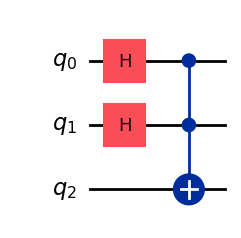

In [79]:
circuit_3 = QuantumCircuit(3)
circuit_3.h(0)
circuit_3.h(1)
circuit_3.ccx(0,1,2)
# circuit_3.cx(1,2)

circuit_3.draw('mpl')

In [80]:
circuit_3_statevector = AerStatevector(circuit_3)
circuit_3_statevector.data

array([ 5.00000000e-01-3.06161700e-17j,  5.00000000e-01+0.00000000e+00j,
        5.00000000e-01-5.55111512e-17j,  7.85046229e-17+7.85046229e-17j,
        0.00000000e+00+3.06161700e-17j,  0.00000000e+00+3.06161700e-17j,
       -3.08148791e-33+3.92523115e-17j,  5.00000000e-01-1.11022302e-16j])

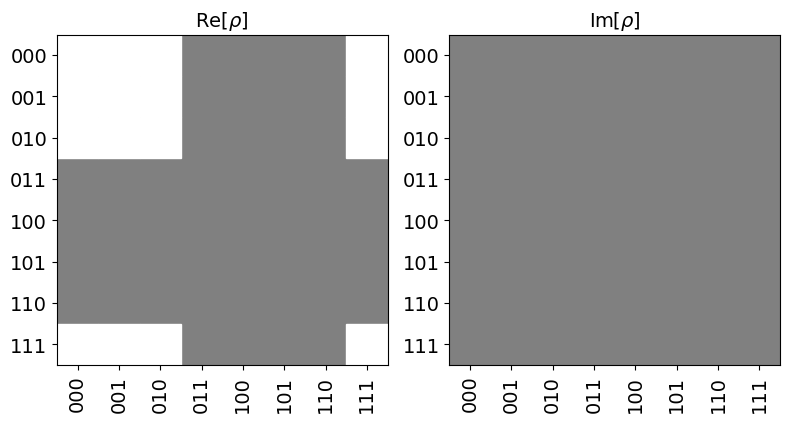

In [81]:
circuit_3_statevector.draw('hinton')

In [ ]:
circuit_3.save_statevector()

In [82]:
simulator = AerSimulator(method='statevector')

circ = transpile(circuit_3, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')
# 
statevector.draw('latex')

<IPython.core.display.Latex object>

eq4sv =
[0.5,   00 -> 0
0.5,    01 -> 0
0,      10 -> 1
0.5]    11 -> 1

val = [x,
y]

for i,x in enumerate(eq4_sv):
    i2 = i << num_ancilla
    val[i2] += x

In [83]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import random_unitary
from qiskit_aer import AerSimulator

import numpy as np

# ROUNDS = 5
# np.random.seed(0)
# x = np.random.uniform(low=0, high=np.pi, size=(ROUNDS,))

# circ = QuantumCircuit(2, ROUNDS)
# for m in range(ROUNDS):
#     circ.reset(0)
#     circ.ry(x[m], 0)
#     circ.unitary(random_unitary(4, seed = m), [0, 1], label = '  $U_' + str(m) + '$  ')
#     circ.save_probabilities([0], label='prob-' + str(m)) # <== here
#     circ.measure(0, m)

# circ.draw('mpl', fold = -1)

In [84]:
simulator = AerSimulator()
tr_circ = transpile(circ)
job = simulator.run(tr_circ)
sim_data = job.result().data()
for m in range(ROUNDS):
    print('Probabilities {}: {}'.format(m, sim_data['prob-' + str(m)]))

KeyError: 'prob-0'